In [15]:
from __future__ import print_function, division
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
feature_names = iris.feature_names
features = iris.data
y = iris.target

# data standardisation
# you could directly use sklearn.preprocessing.StandardScaler
features_mean = np.mean(features,axis=0)
features_var = np.var(features,axis=0)
X = (features - features_mean)/np.sqrt(features_var)

In [16]:
# or using np.cov(X.T)
cov_mat = X.T.dot(X)/(X.shape[0]-1)

In [17]:
print(cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [18]:
unsorted_eig_vals, unsorted_eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %unsorted_eig_vecs)
print('\nEigenvalues \n%s' %unsorted_eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [19]:
# mostly for educational purposes, eigenvalues are already sorted...
# WARNING: advanced numpy indexing: 
# https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html#advanced-indexing

idx = np.argsort(unsorted_eig_vals)[::-1]
eig_vals = unsorted_eig_vals[idx,]
eig_vecs = unsorted_eig_vecs[:,idx,]

In [20]:
tot = np.sum(eig_vals)
explained_var = eig_vals / tot
cum_explained_var = np.cumsum(explained_var)
print('\nExplained variance: \n%s' %explained_var)
print('\nCumulative explained variance: \n%s' %cum_explained_var)


Explained variance: 
[0.72770452 0.23030523 0.03683832 0.00515193]

Cumulative explained variance: 
[0.72770452 0.95800975 0.99484807 1.        ]


In [21]:
# select first k eigenvectors
k = 2
W = eig_vecs[:,:2]
W[:,1] = - W[:,1]
print('\nMatrix W:\n%s' %W)


Matrix W:
[[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


In [22]:
# 2d plotter

def plot_2d(ax, X, **kwargs):
  ax.scatter(X[:, 0], X[:, 1], **kwargs)

def add_labels_2d(ax, X, y, text_label, **kwargs):
  for name, label in text_label: 
    ax.text(X[y == label, 0].mean(),
            X[y == label, 1].mean(),
                 name, **kwargs )


Text(0,0.5,u'PC2')

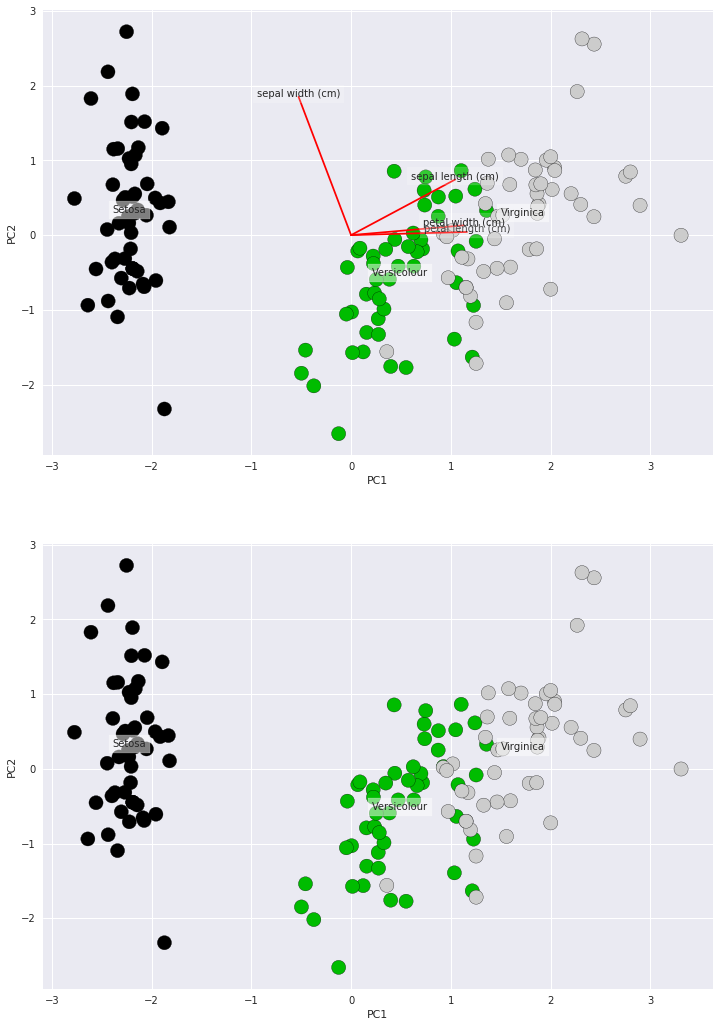

In [23]:
figure, ax = plt.subplots(2,1, figsize=(12, 18))
text_label = [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]

# plotting X in the new subspace:
X_tmp = X.dot(W)

plot_2d(ax[0], X_tmp, c=y,
                    cmap=plt.cm.nipy_spectral,
                    edgecolor='k', s=200)
add_labels_2d(ax[0], X_tmp, y, text_label,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# project original features:
# loadings 
feature_axes = np.identity(4)
#proj_features = feature_axes.dot(W*np.sqrt(eig_vals[:2]))
proj_features = feature_axes.dot(W)
coeff = 2.0

for feature, coord in zip(iris.feature_names, proj_features):
  ax[0].plot([0.0, coeff * coord[0]], 
             [0.0, coeff * coord[1]], 'r')
  
  ax[0].text(coeff*coord[0], coeff*coord[1], feature, horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
  
# using PCA directly:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plot_2d(ax[1], X_pca, c=y,
                    cmap=plt.cm.nipy_spectral,
                    edgecolor='k', s=200)
add_labels_2d(ax[1], X_pca, y, text_label,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')


In [24]:
print(proj_features)

[[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


In [25]:
# Interpreting pca components:
print('\nComponents from pca: \n%s' %pca.components_)


Components from pca: 
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [26]:
# Interpreting explained variance ratio:
print('\nExplained variance ratio from pca: \n%s' %pca.explained_variance_ratio_)
print('\nExplained variance as normalized eigenvalues: \n%s' %explained_var)


Explained variance ratio from pca: 
[0.72770452 0.23030523]

Explained variance as normalized eigenvalues: 
[0.72770452 0.23030523 0.03683832 0.00515193]


In [27]:
distances = [ np.linalg.norm(x) for x in proj_features]

In [28]:
print(distances)

[0.6414772587511762, 0.9622944639133303, 0.5816366637629483, 0.5693813156343822]
